<a href="https://colab.research.google.com/github/TheAmirHK/Quantum_Computation/blob/main/Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Quantum teleportation** involves the transfer of quantum information from one location to another without physically moving the particles themselves. The process relies on a phenomenon called quantum entanglement, which is a special connection that can exist between quantum particles.
Here's a simplified explanation of how it works:


1.   **Entanglement**: Two particles become entangled, linking their quantum states.

2.   **Preparation**: A third particle, carrying the quantum information, becomes entangled with one of the entangled particles, creating a special entangled state involving all three particles.

1.   **Measurement and Transmission**: A measurement is performed on the original entangled particles, resulting in the transmission of classical information to the location of the third particle.

2.   **Reconstruction**: Using the received classical information and the particle at the receiving end, the quantum state of the original particle is reconstructed.

It's important to note that during this process, the original particle's state is destroyed, and the state is effectively recreated at the receiving end. This means that the original particle is not physically moved from one location to another, but its quantum state is transferred to another particle at a distant location.

In [1]:
#!pip install qiskit qiskit_ibm_runtime pylatexenc qiskit_aer

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city
from qiskit.providers.fake_provider import FakeManilaV2
from math import pi
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
def plot_bloch(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return plot_bloch_multivector(result.get_statevector())

def state_vector(circuit_name):
  simulator = Aer.get_backend('statevector_simulator')
  result = execute(circuit_name, backend=simulator).result()
  statevector = result.get_statevector()
  return array_to_latex(statevector, prefix="\\text{statevector = }\n")

Example A quantum teleportation circuit that teleports qubit q00 to q02and the histograms of the execution results. Ref: Liu, C. (2020). Reverse checking of quantum algorithm execution. IEEE Access, 8, 228702-228710.

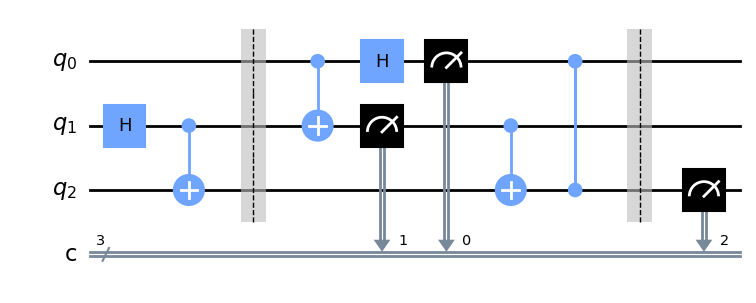

In [10]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(qreg_q, creg_c)

circ.h(qreg_q[1])
circ.cx(qreg_q[1], qreg_q[2])
circ.barrier()

circ.cx(qreg_q[0] ,qreg_q[1])
circ.h(qreg_q[0])

circ.measure(qreg_q[1], creg_c[1])

circ.measure(qreg_q[0], creg_c[0])

circ.cx(qreg_q[1], qreg_q[2])
circ.cz(qreg_q[0], qreg_q[2])
circ.barrier()

circ.measure(qreg_q[2], creg_c[2])

circ.draw(output='mpl')

In [5]:
state_vector(circ)

<IPython.core.display.Latex object>

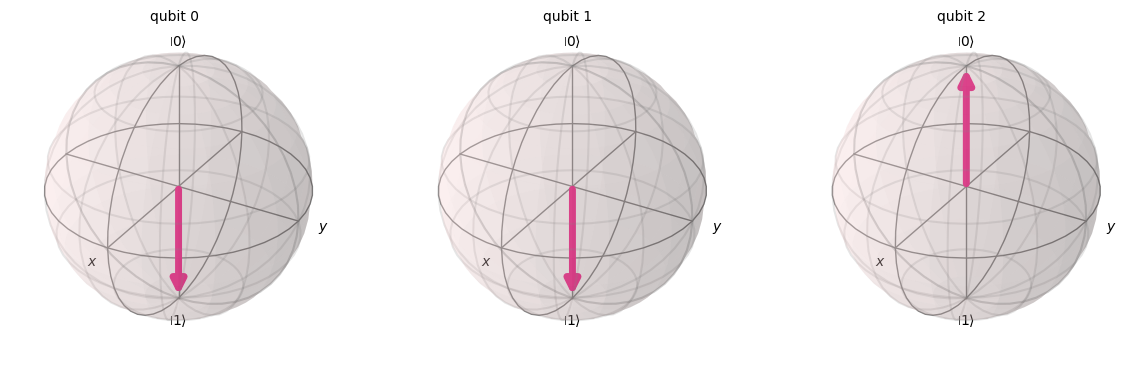

In [6]:
plot_bloch(circ)

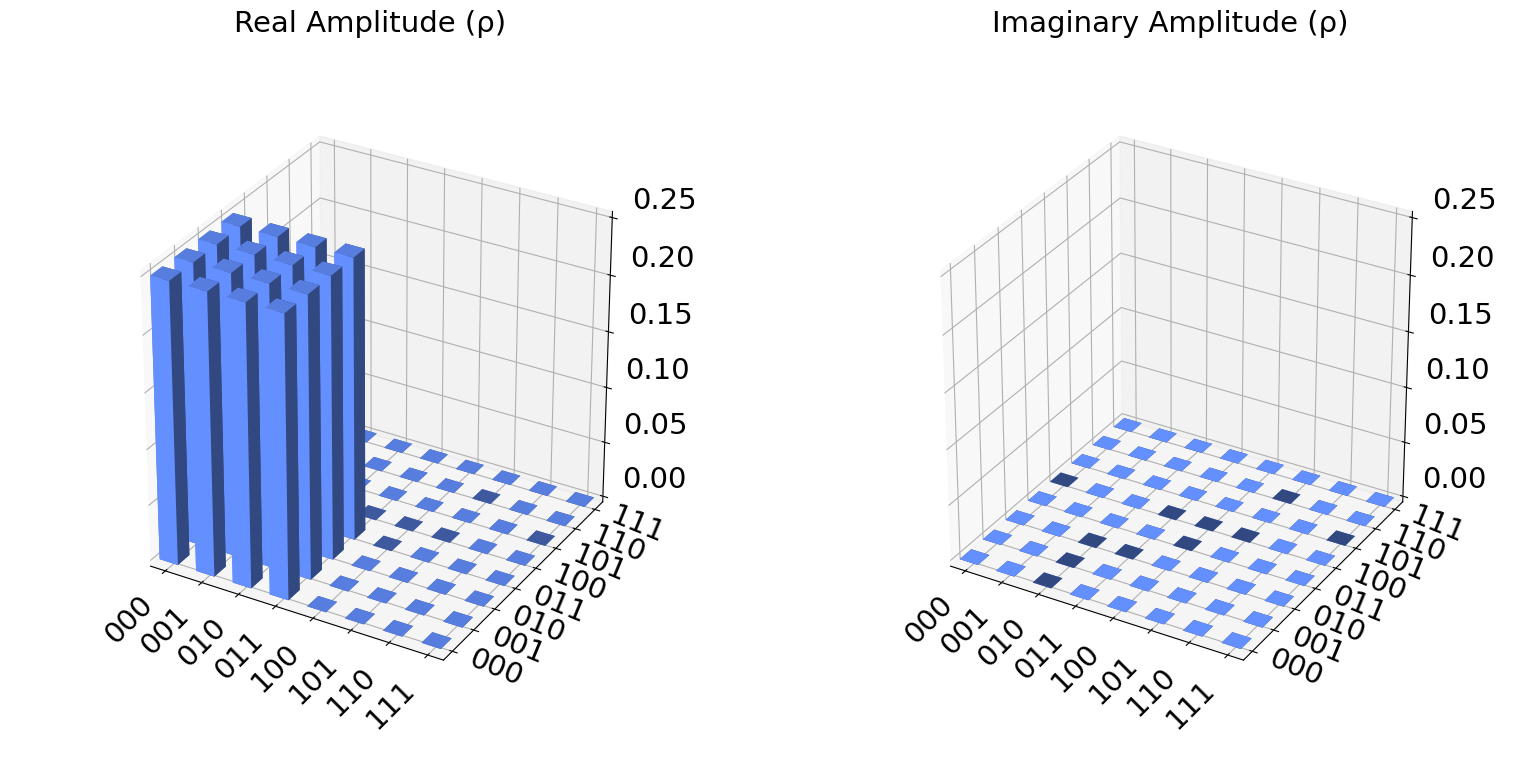

In [9]:
state = Statevector(circ)
plot_state_city(state)

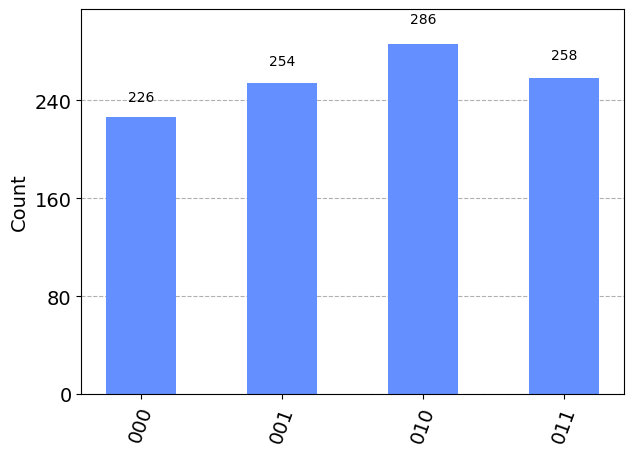

In [11]:
# Ideal simulation
aersim = AerSimulator()
result_ideal = aersim.run(circ).result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal)

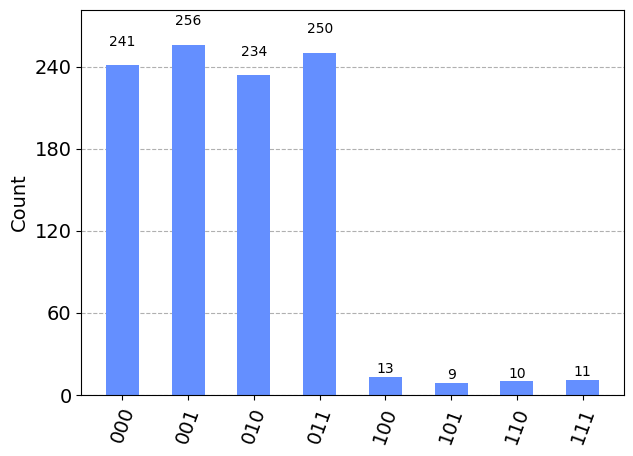

In [12]:
# Noisy simulation
backend = FakeManilaV2()
aersim_backend = AerSimulator.from_backend(backend)
result_noise = aersim_backend.run(circ).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise)